#GPS e o Método de Newton

## O sistema de posicionamento global

<p align = "justify">O Sistema de Posicionamento Global (GPS, sigla do nome em inglês) é um
sistema de navegação formado por uma rede de pelo menos 24 satélites orbitando a Terra e
transmitindo sinais para os receptores GPS, que usam triangulação para calcular
a localização do usuário. Na descrição a seguir, o sistema de coordenadas tem
sua origem $O$ no centro da Terra, o eixo $Oz$ positivo aponta na direção do Polo
Norte, o plano $Oxy$ é o plano do equador com o eixo $Ox$ positivo cortando o
meridiano de Greenwich e o eixo $Oy$ positivo corta o meridiano de longitude
$90^{\circ}$E.</p>

<p align = "justify">Um dado satélite $i$ transmite a sua posição atual $(x_i , y_i , z_i)$ e o instante $te_i$
de emissão do sinal. O receptor GPS grava esta informação juntamente com
o instante $tr_i$ da recepção do sinal. Entretanto, o relógio do receptor é menos
preciso do que o relógio do satélite, havendo um erro de sincronia $T$ . O instante
correto da recepção é $tr_i - T$ . Se $T > 0$ o relógio do receptor está adiantado e
se $T < 0$ ele está atrasado.</p>

<p align = "justify">Portanto, o tempo que o sinal leva do satélite ao receptor é $t_i - T$ , onde
$t_i = tr_i - te_i$ é o lapso de tempo aparente, e o receptor deve estar na superfı́cie
da esfera de raio $c(t_i - T)$ e centro $(x_i , y_i , z_i)$, onde $c = 299792458$ m/s é a
velocidade da luz no vácuo. As coordenadas $(x, y, z)$ do receptor devem então
satisfazer a relação</p>

\begin{equation*}
  (x - x_i)^2 + (y - y_i)^2 + (z - z_i)^2 = (w_i - w)^2
\end{equation*}

<p align = "justify">em que $w_i = ct_i$ e $w = cT$ (ao multiplicarmos por c, ficamos apenas com dimensões
espaciais).</p>

<p align = "justify">Em qualquer instante, dados de 5 a 8 satélites são obtidos pelo receptor em
qualquer ponto da terra. Então, assumindo que temos dados de $n > 4$ satélites,
as 4 incógnitas $(x, y, z, w)$ devem satisfazer as equações</p>

\begin{equation}
  r_i(x,y,z,w) = (x - x_i)^2 + (y - y_i)^2 + (z - z_i)^2 - (w_i - w)^2 = 0, \tag{1}
\end{equation}

<p align = "justify">$1 \le i \le n$, que formam um sistema não-linear sobredeterminado. Como as
medidas estão sujeitas a erros, este sistema em geral não tem solução (se não
houvesse erros, bastaria resolver 4 das n equações).</p>

## Mínimos quadrados não-lineares

Uma maneira de se resolver o problema acima é tratá-lo como um problema
de mı́nimos quadrados, procurando-se **minimizar a soma dos quadrados dos resı́duos** $r_i$ , ou seja, determinando-se $\bar x$, $\bar y$, $\bar z$ e $\bar w$ que minimizam

$$
  g(x,y,z,w) = \sum_{i=1}^n r_i(x,y,z,w)^2.
$$

Uma condição necessária que um ponto de mínimo deve satisfazer é

\begin{equation}
  \nabla g(x, y, z, w) = 0 \tag{2}
\end{equation}

<p align = "justify">em que $\nabla g$ é o gradiente de $g$ em relação a $x$, $y$, $z$ e $w$. A condição acima é um
sistema não-linear de 4 equações e 4 incógnitas, que será resolvido usando o
método de Newton.</p>

## Mínimos quadrados lineares

<p align = "justify">Suponha que as equações $(1)$ são exatas. Se subtrairmos a equação $n$ da
equação $i$, os termos quadráticos cancelam e portanto das relações</p>

\begin{equation}
  r_i(x,y,z,w) - r_n(x,y,z,w) = 0,\quad 1 \le i \le n-1 \tag{3}
\end{equation}

<p align = "justify">obtemos um sistema linear sobredeterminado para as incógnitas que pode ser
resolvido no sentido de mı́nimos quadrados como foi visto
em aula.</p>

<p align = "justify">Se $A$ denota a matriz do sistema linear, $\mathbf{x}$ o vetor incógnita e $\mathbf{b}$ o lado
direito do sistema linear, a solução de $A\mathbf{x} = \mathbf{b}$ no sentido de mı́nimos quadrados
é a solução do sistema normal $A^TA\mathbf{x} = A^T\mathbf{b}$. Esta solução pode ser usada
como uma aproximação em si para a localização usando GPS, e também como
aproximação inicial para a resolução de $(2)$ usando o método de Newton.</p>

## ❗Exercício 1

<p align = "justify">Escreva explicitamente o sistema não-linear $(2)$ e o sistema linear sobredeterminado $(3)$. Você não precisa entregar as respostas. Conhecê-las é importante para as implementações.</p>

Dados simulados com solução exata:
Satélite 1:
  x = 7490802.38 m
  y = 3119890.41 m
  z = 411689.89 m
  tei = 0.000000000 s
  tri = 0.023607852 s
Satélite 2:
  x = 19014286.13 m
  y = 1161672.24 m
  z = 19398197.04 m
  tei = 0.000000000 s
  tri = 0.081306211 s
Satélite 3:
  x = 14639878.84 m
  y = 17323522.92 m
  z = 16648852.82 m
  tei = 0.000000000 s
  tri = 0.082192927 s
Satélite 4:
  x = 11973169.68 m
  y = 12022300.23 m
  z = 4246782.21 m
  tei = 0.000000000 s
  tri = 0.049747463 s
Satélite 5:
  x = 3120372.81 m
  y = 14161451.56 m
  z = 3636499.34 m
  tei = 0.000000000 s
  tri = 0.041234396 s

==== SISTEMA NÃO LINEAR (2)====
As equações têm a forma:
r_i(x, y, z, w) = (x - xi)^2 + (y - yi)^2 + (z - zi)^2 - (wi - w)^2 = 0

Eq. 1:
(x - 7490802.37694725)² + (y - 3119890.406724053)² + (z - 411689.88591604895)² - (7077006.377439963 - w)² = 0

Eq. 2:
(x - 19014286.128198322)² + (y - 1161672.2433639893)² + (z - 19398197.043239888)² - (24374539.26549313 - w)² = 0

Eq. 3:
(x - 14639878.83

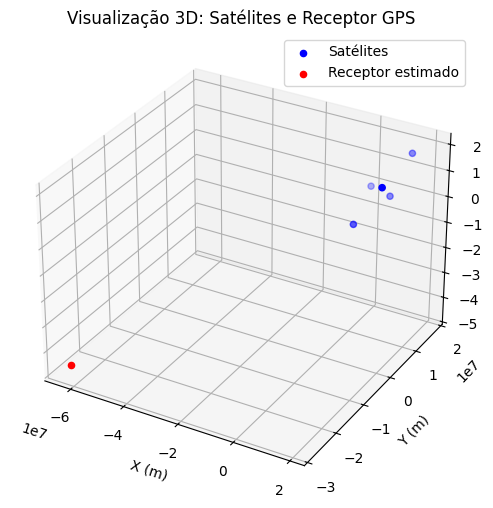

(array([ 7490802.37694725, 19014286.12819832, 14639878.8362281 ,
        11973169.68394073,  3120372.80884873]),
 array([ 3119890.40672405,  1161672.24336399, 17323522.9154987 ,
        12022300.23486418, 14161451.55592091]),
 array([  411689.88591605, 19398197.04323989, 16648852.81600844,
         4246782.21356552,  3636499.34414201]),
 array([0.02360785, 0.08130621, 0.08219293, 0.04974746, 0.0412344 ]),
 array([ 2.73871211e+13, -3.71794478e+13, -5.68807092e+13, -6.40534284e+12]),
 299792458,
 array([-63806744.26043157, -27767358.18905335, -46194004.87236033,
        -86335876.94001883]),
 array([[  7490802.37694725,   3119890.40672405,    411689.88591605,
          -7077006.37743996],
        [ 19014286.12819832,   1161672.24336399,  19398197.04323989,
         -24374539.26549313],
        [ 14639878.8362281 ,  17323522.9154987 ,  16648852.81600844,
         -24640369.97290947],
        [ 11973169.68394073,  12022300.23486418,   4246782.21356552,
         -14913464.41301879]]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp



# ======================================
# PARA ENTRADA DE DADOS PELO USUÁRIO
# ================================================
#c = 299792458  # Velocidade da luz no vácuo (m/s)
#print("==== ENTRADA DE DADOS ====")
#n = int(input("Quantos satélites você deseja inserir (mínimo 5)? "))
# Validação da quantidade de satélites
#if n < 5:
#    print("Número insuficiente de satélites. Definindo n = 5 por padrão.")
#    n = 5

# Inicialização de listas para armazenar os dados dos satélites
#xi, yi, zi = [], [], []  # Coordenadas
#tei, tri = [], []        # Tempos de emissão e recepção

# Leitura dos dados de cada satélite
#print("\n>>> Digite os dados para cada satélite:")
#for i in range(n):
#    print(f"\nSatélite {i+1}:")
#    xi.append(float(input("  x (em metros): ")))
#    yi.append(float(input("  y (em metros): ")))
#    zi.append(float(input("  z (em metros): ")))
#    tei.append(float(input("  Tempo de emissão tei (s): ")))
#    tri.append(float(input("  Tempo de recepção tri (s): ")))
#print("valores de entrada",xi,yi,zi,tei,tri)
# Conversão de listas para arrays numpy (para facilitar os cálculos vetoriais posteriormente)


# ==============================
# PARA DADOS ALEATÓRIOS
# ==============================
c = 299792458  # Velocidade da luz no vácuo (m/s)
n = 5
  # Posição real do receptor (escolhida arbitrariamente)
xr, yr, zr = 1.0e6, 2.0e6, 3.0e6  # metros
T = 1.5e-6  # erro do relógio em segundos (1,5 microssegundos)
w = T * c   # erro do relógio em metros

  # Gerar coordenadas de 5 satélites (espalhados em posições distintas)
np.random.seed(42)  # para reprodutibilidade
xi = np.random.uniform(0, 2e7, 5)
yi = np.random.uniform(0, 2e7, 5)
zi = np.random.uniform(0, 2e7, 5)

  #todos os tempos de emissão = 0 (simplifica)
tei = np.zeros(5)

  # Calcula distância real entre receptor e cada satélite
wi = np.sqrt((xr - xi)**2 + (yr - yi)**2 + (zr - zi)**2)

  # Tempo de recepção = tempo de emissão + wi/c + erro T
tri = tei + wi / c + T

  # Mostrar os dados simulados
print("Dados simulados com solução exata:")
for i in range(n):
  print(f"Satélite {i+1}:")
  print(f"  x = {xi[i]:.2f} m")
  print(f"  y = {yi[i]:.2f} m")
  print(f"  z = {zi[i]:.2f} m")
  print(f"  tei = {tei[i]:.9f} s")
  print(f"  tri = {tri[i]:.9f} s")


def sistemas_gps(xi, yi, zi, tei, tri, wi, c):

  xi = np.array(xi)
  yi = np.array(yi)
  zi = np.array(zi)
  tei = np.array(tei)
  tri = np.array(tri)

    # ==============================
  # EXIBIÇÃO DAS EQUAÇÕES NÃO LINEARES
  # ==============================

  print("\n==== SISTEMA NÃO LINEAR (2)====")
  print("As equações têm a forma:")
  print("r_i(x, y, z, w) = (x - xi)^2 + (y - yi)^2 + (z - zi)^2 - (wi - w)^2 = 0")
  for i in range(n):
    print(f"\nEq. {i+1}:")
    print(f"(x - {xi[i]})² + (y - {yi[i]})² + (z - {zi[i]})² - ({wi[i]} - w)² = 0")


    # ==============================
    # SISTEMA LINEAR
    # ==============================

  print("\n==== EQUAÇÕES DO SISTEMA LINEAR (3) ====")
  # Satélite de referência
  x_n, y_n, z_n, w_n = xi[-1], yi[-1], zi[-1], wi[-1]

# Vetor b com n-1 equações (diferença entre equações dos satélites i e o satélite de referência)
  b = np.zeros(n - 1)
  for i in range(n - 1):
    b[i] = 0.5 * (
        (xi[-1]**2 - xi[i]**2) +
        (yi[-1]**2 - yi[i]**2) +
        (zi[-1]**2 - zi[i]**2) -
        (wi[-1]**2 - wi[i]**2)
    )

    print(f"\nEq. {i+1}:")
    print(f"(x - {xi[i]})² + (y - {yi[i]})² + (z - {zi[i]})² - ({wi[i]} - w)² - "f"[(x - {xi[-1]})² - (y - {yi[-1]})² - (z - {zi[-1]})² + ({wi[-1]} - w)²] = 0 ")

    # Inicializa a matriz A (coeficientes do sistema linear)
  A = np.zeros((n - 1, 4))

      # Preenche a matriz A com base nas equações do sistema linearizado
  for i in range(n-1):
    A[i, 0] = xi[i]
    A[i, 1] = yi[i]
    A[i, 2] = zi[i]
    A[i, 3] = - wi[i]  #(com sinal trocado por estrutura do sistema)
    A = np.array(A)
      #Mostra matriz de coeficientes final
  print("\nMatriz A do sistema linear:")
  print(A),
  print("vetor b",b)


  # ==============================
  # RESOLUÇÃO PELO MÉTODO DOS MÍNIMOS QUADRADOS
  # ==============================

  print("\n==== RESOLVENDO POR MÍNIMOS QUADRADOS ====")

  # montar a matriz normal A^T A
  ATA = A.T @ A
  print("\nMatriz normal A^T A:")
  print(ATA)

  # montar o vetor A^T b
  ATb = A.T @ b
  print("\nVetor A^T b:")
  print(ATb)

  # resolver o sistema linear (A^T A) x = A^T b, o np.linalg.solve resolve o sistema linear com precisão. A primeira linha verifica se A^T A é invertível
  if np.linalg.matrix_rank(ATA) == ATA.shape[0]:
      mmq = np.linalg.solve(ATA, ATb)
      print("\nSolução do sistema (estimativa do receptor):")
      print("x =", mmq[0], "m")
      print("y =", mmq[1], "m")
      print("z =", mmq[2], "m")
      print("w (erro do relógio em metros) =", mmq[3], "m")

      # Conversão do erro do relógio de metros para segundos
      T = mmq[3] / c
      print(f"T (erro do relógio em segundos) = {T:.12f} s")
  else:
      print("\nA matriz AᵀA não é invertível. O sistema pode estar mal condicionado.")

# ==============================
# VISUALIZAÇÃO INICIAL
# ==============================
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(xi, yi, zi, color='blue', label='Satélites')
  ax.scatter(mmq[0], mmq[1], mmq[2], color='red', label='Receptor estimado')
  ax.set_xlabel('X (m)')
  ax.set_ylabel('Y (m)')
  ax.set_zlabel('Z (m)')
  ax.set_title('Visualização 3D: Satélites e Receptor GPS')
  ax.legend()
  plt.show()
  return xi,yi,zi,tri,b,c, mmq,A

sistemas_gps(xi, yi, zi, tei, tri, wi, c)


## Método de Newton para sistemas não lineares

<p align = "justify">Vamos descrever o método de Newton para determinação de raı́zes de funções $F(x)$ de $\mathbb{R}^n$ em $\mathbb{R}^n$. Como no caso unidimensional, parte-se de uma aproximação inicial $x^{0}$ para o valor $\bar{x}\in\mathbb{R}^n$ tal que $F(\bar{x})=0$ e calcula-se a sequência

$$
  x^{(k+1)} = x^{(k)} - J_F^{-1}(x^{(k)})F(x^{(k)})
$$
em que $J_F(x)$ é a matriz Jacobiana de $F$avaliada no ponto $x$:

$$
  J_F(x) = \left[\begin{array}{cccc}
  \frac{\partial F_1(x)}{\partial x_1} & \frac{\partial F_1(x)}{\partial x_2} & \cdots & \frac{\partial F_1(x)}{\partial x_n}\\
  \frac{\partial F_2(x)}{\partial x_1} & \frac{\partial F_2(x)}{\partial x_2} & \cdots & \frac{\partial F_2(x)}{\partial x_n}\\
  \vdots & \vdots & \cdots & \vdots\\
  \frac{\partial F_n(x)}{\partial x_1} & \frac{\partial F_n(x)}{\partial x_2} & \cdots & \frac{\partial F_n(x)}{\partial x_n}
  \end{array}\right],
$$

onde $F_1(x)$, $F_2(x)$, $\cdots$, $F_n(x)$ são as componentes de $F(x)$.</p>

Se reescrevermos as iterações do Método de Newton como

$$
  J_F(x^{(k)})(x^{(k+1)}-x^{(k)}) = -F(x^{(k)}),
$$

<p align = "justify">é possível perceber que não é necessário inverter a matriz Jacobiana de $F$ a cada passo, que seria muito custoso. A cada passo do Método de Newton, resolve-se o sistema linear</p>

$$
  J_F(x^{(k)})\cdot\mathbf{c} = -F(x^{(k)})
$$

e calcula-se a nova aproximação como

$$
  x^{(k+1)} = x^{(k)} + \mathbf{c}
$$

<p align = "justify">Quando F é de classe
$C^2$ e a matriz Jacobiana é não singular na raiz de $F$ (ou seja, tem determinante
não nulo), pode-se mostrar que o método de Newton converge quadraticamente
para a raiz de $F$ , desde que $x^{(0)}$ seja escolhido suficientemente próximo da raiz.</p>

## ❗Exercício 2

Para $F(x,y,z,w) = \nabla g(x,y,z,w)$, qual é a expressão para $J_F(x,y,z,w)$?


==== SISTEMA NÃO LINEAR (2)====
As equações têm a forma:
r_i(x, y, z, w) = (x - xi)^2 + (y - yi)^2 + (z - zi)^2 - (wi - w)^2 = 0

Eq. 1:
(x - 7490802.37694725)² + (y - 3119890.406724053)² + (z - 411689.88591604895)² - (7077006.377439963 - w)² = 0

Eq. 2:
(x - 19014286.128198322)² + (y - 1161672.2433639893)² + (z - 19398197.043239888)² - (24374539.26549313 - w)² = 0

Eq. 3:
(x - 14639878.836228102)² + (y - 17323522.915498704)² + (z - 16648852.816008436)² - (24640369.97290947 - w)² = 0

Eq. 4:
(x - 11973169.683940733)² + (y - 12022300.234864175)² + (z - 4246782.213565523)² - (14913464.413018787 - w)² = 0

Eq. 5:
(x - 3120372.8088487303)² + (y - 14161451.55592091)² + (z - 3636499.3441420123)² - (12361311.265824892 - w)² = 0

==== EQUAÇÕES DO SISTEMA LINEAR (3) ====

Eq. 1:
(x - 7490802.37694725)² + (y - 3119890.406724053)² + (z - 411689.88591604895)² - (7077006.377439963 - w)² - [(x - 3120372.8088487303)² - (y - 14161451.55592091)² - (z - 3636499.3441420123)² + (12361311.265824892 - w)²]

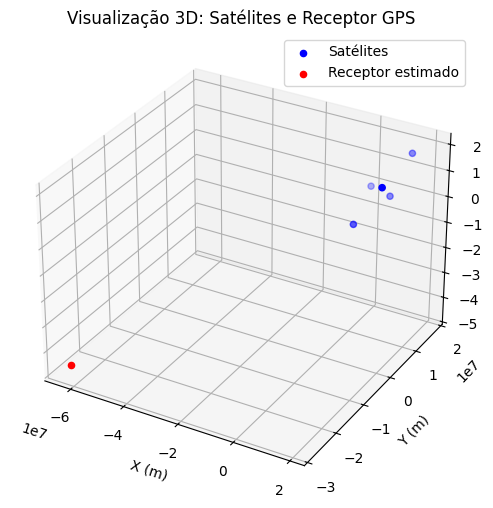


================ Iteração 1 ================
Construindo sistema vetorial F(x, y, z, w):
f_1(x,y,z,w) = sqrt((-63806744.260432-7490802.376947)² + (-27767358.189053-3119890.406724)² + (-46194004.872360-411689.885916)²) - 299792458.00*(0.000000000 - -86335876.940019/299792458.00) = 4270155.233497
f_2(x,y,z,w) = sqrt((-63806744.260432-19014286.128198)² + (-27767358.189053-1161672.243364)² + (-46194004.872360-19398197.043240)²) - 299792458.00*(0.000000000 - -86335876.940019/299792458.00) = 23202010.699514
f_3(x,y,z,w) = sqrt((-63806744.260432-14639878.836228)² + (-27767358.189053-17323522.915499)² + (-46194004.872360-16648852.816008)²) - 299792458.00*(0.000000000 - -86335876.940019/299792458.00) = 23828931.399554
f_4(x,y,z,w) = sqrt((-63806744.260432-11973169.683941)² + (-27767358.189053-12022300.234864)² + (-46194004.872360-4246782.213566)²) - 299792458.00*(0.000000000 - -86335876.940019/299792458.00) = 13012425.897806
f_5(x,y,z,w) = sqrt((-63806744.260432-3120372.808849)² + (-27767358.1

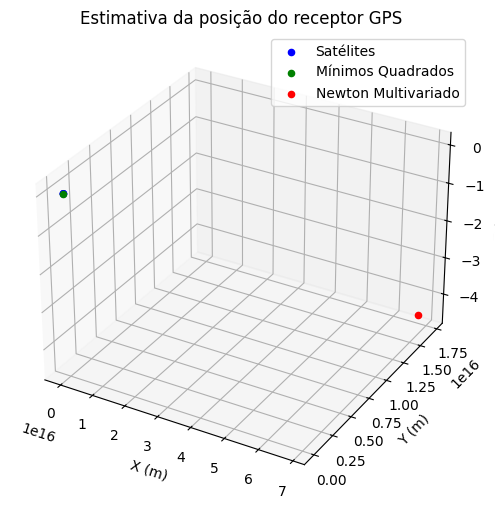

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ===================================================
# Método de Newton para estimativa de GPS
# ===================================================
def metodo_newton(xi, yi, zi, tri, mmq, c = 299792458, tol=1e-6, max_iter=10):
    # Estimativa inicial (obtida pelo método dos mínimos quadrados)
    x, y, z, w = mmq[0], mmq[1], mmq[2], mmq[3]  # chute inicial para posição (x, y, z) e erro do relógio w
    n = len(xi)       # número de satélites

    for it in range(max_iter):
        f = np.zeros(n)       # vetor de funções F(x, y, z, w)
        J = np.zeros((n, 4))  # matriz Jacobiana J_F(x, y, z, w)

        print(f"\n================ Iteração {it+1} ================")
        print("Construindo sistema vetorial F(x, y, z, w):")

        for i in range(n):
            dx = x - xi[i]
            dy = y - yi[i]
            dz = z - zi[i]
            d = np.sqrt(dx**2 + dy**2 + dz**2)  # distância receptor-satélite

            # Função f_i(x, y, z, w)
            f[i] = d - c * (tri[i] - w / c)

            # Derivadas parciais para a Jacobiana
            J[i, 0] = dx / d  # ∂f_i/∂x
            J[i, 1] = dy / d  # ∂f_i/∂y
            J[i, 2] = dz / d  # ∂f_i/∂z
            J[i, 3] = 1.0     # ∂f_i/∂w

            # Impressão simbólica com valores reais
            print(f"f_{i+1}(x,y,z,w) = sqrt(({x:.6f}-{xi[i]:.6f})² + ({y:.6f}-{yi[i]:.6f})² + ({z:.6f}-{zi[i]:.6f})²) - {c:.2f}*({tri[i]:.9f} - {w:.6f}/{c:.2f}) = {f[i]:.6f}")

        # Impressão simbólica da função vetorial F(x,y,z,w)
        print("\nFunção vetorial F(x,y,z,w) = [f₁, f₂, ..., fₙ]^T com valores:")
        for i in range(n):
            print(f"f_{i+1} = {f[i]:.6f}")

        # Impressão da Jacobiana de F com valores
        print("\nMatriz Jacobiana J_F(x,y,z,w) com valores reais:")
        for i in range(n):
            print(f"∂f_{i+1}/∂x = {J[i,0]:.6f}, ∂f_{i+1}/∂y = {J[i,1]:.6f}, ∂f_{i+1}/∂z = {J[i,2]:.6f}, ∂f_{i+1}/∂w = {J[i,3]:.6f}")

        print("\nForma simbólica geral da Jacobiana J_F(x,y,z,w):")
        print("""
        J_F(x) = [ [∂F₁/∂x, ∂F₁/∂y, ∂F₁/∂z, ∂F₁/∂w], [∂F₂/∂x, ∂F₂/∂y, ∂F₂/∂z, ∂F₂/∂w], ... [∂Fₙ/∂x, ∂Fₙ/∂y, ∂Fₙ/∂z, ∂Fₙ/∂w]]     """)

        # Impressão da equação do sistema com valores
        print("\nSistema linear a resolver: J_F(xᵏ) · Δ = -F(xᵏ)")
        print("Matriz J_F(xᵏ):")
        print(J)
        print("Vetor -F(xᵏ):")
        print(-f)

        # Resolvendo o sistema linear para Δ
        try:
            delta = np.linalg.lstsq(J, -f, rcond=None)[0]
        except np.linalg.LinAlgError:
            print("Erro: Jacobiana não é invertível.")
            return None

        # Atualiza as estimativas
        x += delta[0]
        y += delta[1]
        z += delta[2]
        w += delta[3]

        # Impressão das correções e nova estimativa
        print("\nCorreções (Δ):")
        print(f"Δx = {delta[0]:.6f}, Δy = {delta[1]:.6f}, Δz = {delta[2]:.6f}, Δw = {delta[3]:.6f}")
        print(f"Nova estimativa: x = {x:.6f}, y = {y:.6f}, z = {z:.6f}, w = {w:.6f}")
        print(f"Norma de Δ: {np.linalg.norm(delta):.2e}")

        if np.linalg.norm(delta) < tol:
            print(f"\n Convergência alcançada em {it+1} iterações.")
            break

    T_estimado = w / c  # conversão de erro do relógio para tempo

    # Resultado final
    print("\n======= Resultado Final =======")
    print(f"x_receptor = {x:.6f}")
    print(f"y_receptor = {y:.6f}")
    print(f"z_receptor = {z:.6f}")
    print(f"erro_do_relogio = {w:.6f} s")
    print(f"tempo_estimado = {T_estimado:.9f} s")

    return x, y, z, T_estimado

# =====================================
# Supõe que os dados e função sistemas_gps() estejam definidos
# =====================================
xi, yi, zi, tri, b, c, mmq, A = sistemas_gps(xi, yi, zi, tei, tei, wi, c)  # dados simulados do Código 1

# Aplica o método de Newton
x_receptor, y_receptor, z_receptor, tempo_estimado = metodo_newton(xi, yi, zi, tri, mmq)

# =====================================
# Visualização 3D da estimativa
# =====================================
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, color='blue', label='Satélites')
ax.scatter(mmq[0], mmq[1], mmq[2], color='green', label='Mínimos Quadrados')
ax.scatter(x_receptor, y_receptor, z_receptor, color='red', label='Newton Multivariado')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Estimativa da posição do receptor GPS')
ax.legend()
plt.show()


# Tarefa

<p align = "justify">Você deve implementar um algoritmo para resolver um sistema não linear com $m$ equações e $m$ incógnitas.
Várias funções são necessárias para esta implementação. Comecemos por carregar o numpy. É o $\mathbf{único}$ módulo do Python que você irá usar.</p>

In [ ]:
import numpy as np

## Resolução de sistemas lineares

Implemente a decomposição $LU$ de uma matriz $A$, com condensação pivotal, de acordo com o algoritmo

Dados $n$ e uma matrz $A$ (n\times n)$ temos:

&ensp;  $\bullet$ Para $k$ de $1$ a $n$ faça

&emsp; &emsp; - para $i$ de $k$ a $n$ faça $$a_{ik}=a_{ik}-\sum_{j=1}^{k-1}a_{ij}*a_{jk}$$

&emsp; &emsp; - Determine $l\ge k$ tal que $\vert a_{lk}\vert=\max_{k\le i\le n}\vert a_{ik}\vert$

&emsp; &emsp; - defina $p(k)=l$

&emsp; &emsp; - se $k\ne p(k)$ troque as linhas $k$ e $p(k)$ da matriz $A$

&emsp; &emsp; - para $j$ de $k+1$ a $n$ faça \begin{align} &a_{kj}=a_{kj}-\sum_{i=1}^{k-1}a_{ki}*a_{ij}\\ &a_{jk} = a_{jk}/a_{kk}\end{align}

**Observações:**

1. Ao final do algoritmo a matriz $L$ tem seus valores abaixo da diagonal
principal armazenados nas posições correspondentes de A (lembre-se que
a diagonal de L é composta de $1'$s).

2. A matriz $U$ tem seus valores da diagonal principal e acima desta armazenados nas posições correspondentes de $A$.

3. A decomposição $LU$ calculada corresponde à matriz $A$ permutada. As permutações realizadas estão armazenadas no vetor $p$ definido no algoritmo.

4. Lembre-se que ao final do algoritmo a matriz $A$ foi modificada. Caso esta
ainda seja necessária, uma cópia sua deve ser anteriormente salva.

5. Somatórios de $1$ a $0$ e loops de $n + 1$ a $n$ devem ser entendidos como vazios.

In [ ]:
import numpy as np

def lu_dcmp(A):
    """
    Calcula a decomposição LU da matriz A com pivotamento parcial (condensação pivotal).
    A matriz LU é armazenada em uma única matriz A_cp, onde:
      - A parte inferior da diagonal contém os multiplicadores de L.
      - A parte da diagonal e superior contém os elementos de U.
    Também retorna o vetor de permutação de linhas p.

    Entrada:
    - A: matriz quadrada de tamanho n x n

    Saída:
    - A_cp: matriz contendo L e U sobrepostas
    - p: vetor de permutação de linhas
    """
    A_cp = np.copy(A).astype(float)
    n, m = A_cp.shape

    if n != m:#verificar se a matriz é quadrada"
        raise ValueError(f"Matriz A deve ser quadrada. Recebido {n}x{m}.")

    p = np.arange(n)

    print("\n========= INÍCIO DA DECOMPOSIÇÃO LU =========\n")
    for k in range(n - 1):
        print(f"\n=== Etapa {k+1} da eliminação (coluna {k}) ===")

        # Escolha do pivô (linha com maior valor absoluto na coluna)
        indice_pivo = np.argmax(np.abs(A_cp[k:, k])) + k
        if A_cp[indice_pivo, k] == 0:
            raise ValueError("Matriz singular!")

        # Troca de linhas, se necessário
        if indice_pivo != k:
            A_cp[[k, indice_pivo]] = A_cp[[indice_pivo, k]]
            p[[k, indice_pivo]] = p[[indice_pivo, k]]
            print(f"Permutando linhas {k} e {indice_pivo}")
            print("Matriz após permutação:")
            print(A_cp)

        # Eliminação de Gauss (submatriz abaixo da diagonal)
        for i in range(k + 1, n):
            m_ik = A_cp[i, k] / A_cp[k, k]
            A_cp[i, k] = m_ik  # Armazena multiplicador na posição de L
            for j in range(k + 1, n):
              A_cp[i, j] -= m_ik * A_cp[k, j]

            # Impressão didática
            print(f"\nMultiplicador m_{i+1}{k+1} = {m_ik:.6f}")
            for j in range(k + 1, n):
                print(f"A[{i},{j}] atualizado para {A_cp[i,j]:.6f}")

    print("\n========= MATRIZ LU (com L e U sobrepostas) =========")
    print(A_cp)
    print("\nVetor de permutação p:")
    print(p)
    return A_cp, p


Uma vez obtida a decomposição $LU$ da matriz $A$, calcule a solução do sistema linear $A\mathbf{x} = \mathbf{b}$.

In [ ]:
import numpy as np

def lu_solve(LU, p, b):
    """
    Calcula a solução de um sistema linear Ax = b, dada a decomposição LU de A e o vetor de permutações.

    Entrada:
    - LU: matriz quadrada de tamanho n,
            contendo a matriz U em sua parte triangular superior (incluindo a diagonal)
            e a matriz L (apenas a parte abaixo da diagonal) em sua parte triangular inferior.
            A diagonal de L não é armazenada.
    - p: vetor de tamanho n, contendo os índices das linhas permutadas em cada etapa da condensação pivotal.
    - b: vetor de tamanho n (lado direito do sistema linear)

    Saída:
    - x: vetor de tamanho n (solução do sistema linear)
    """
    n = LU.shape[0]

    # 1. Permutar o vetor b de acordo com o vetor de permutações p
    b_permutado = b[p]

    # 2. Resolver o sistema Ly = b'
    # Inicializar o vetor y
    y = np.zeros(n)

    # Substituição direta para resolver Ly = b'
    for i in range(n):
        y[i] = b_permutado[i] - np.sum(LU[i, :i] * y[:i])

    # 3. Resolver o sistema Ux = y
    # Inicializar o vetor x
    x = np.zeros(n)

    # Substituição direta para resolver Ux = y
    for i in range(n-1, -1, -1):  # Fazendo a substituição de trás para frente
        x[i] = (y[i] - np.sum(LU[i, i+1:] * x[i+1:])) / LU[i, i]

    return x

# Teste da função
A = np.array([[4, -2, 1], [3, 6, -1], [2, 1, 8]], dtype=float)
b = np.array([1, 2, 3], dtype=float)

# Decomposição LU
LU, p = lu_dcmp(A)

# Resolver o sistema
x = lu_solve(LU, p, b)

print("Solução do sistema Ax = b:")
print


========= INÍCIO DA DECOMPOSIÇÃO LU =========


=== Etapa 1 da eliminação (coluna 0) ===

Multiplicador m_21 = 0.750000
A[1,1] atualizado para 7.500000
A[1,2] atualizado para -1.750000

Multiplicador m_31 = 0.500000
A[2,1] atualizado para 2.000000
A[2,2] atualizado para 7.500000

=== Etapa 2 da eliminação (coluna 1) ===

Multiplicador m_32 = 0.266667
A[2,2] atualizado para 7.966667

========= MATRIZ LU (com L e U sobrepostas) =========
[[ 4.         -2.          1.        ]
 [ 0.75        7.5        -1.75      ]
 [ 0.5         0.26666667  7.96666667]]

Vetor de permutação p:
[0 1 2]
Solução do sistema Ax = b:


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

Com estas implementações, podemos usar o Método de Newton para a resolução de sistemas não lineares.

In [ ]:
def newton_sitemas(F, JF, x0, tol, max_iter):
  """
  Método de Newton para aproximar a raiz de F com tolerância tol

  Entradas:
  - F: função a ser resolvida (o usuário deve implementar uma função
       que recebe um vetor x e retorna um vetor F(x))
  - JF: função que recebe um vetor x e retorna a matriz Jacobiana de F, JF(x)
  - x0: aproximação inicial
  - tol: tolerância desejada, usada no critério de parada
  - max_iter: numero máximo de iterações

  Saída:
    - x: vetor com a aproximação da raiz de F dentro da tolerância especificada
         (ou após o número máximo de iterações ser atingido)
  """
  x = np.copy(x0)  # x: aproximação inicial em cada iteração

  for k in range(max_iter):  # iterações
    xold = np.copy(x)  # guarda a aproximação anterior

        # Etapa 1: Cálculo de F(xk) e JF(xk)
    Fxk = F(x)  # calcula F em xk (gradiente)
    JFxk = JF(x)  # calcula JF em xk (jacobiana)

      # Em cada iteração, queremos resolver: JF(xk) * cor = -F(xk)
      # para obter a correção c e atualizar x_{k+1} = x_k + c

    print(f"\n=== Iteração {k+1} ===")
    print(f"F(xk): {Fxk}")
    print(f"JF(xk):\n{JFxk}")

        # Etapa 2: Decomposição LU de JFxk
    LU, p = lu_dcmp(JFxk)  # decomposição LU de JFxk
    print(f"Matriz LU de JF(xk):\n{LU}")
    print(f"Vetor de permutação p: {p}")

        # Etapa 3: Resolver o sistema linear JFxk * cor = -Fxk
    cor = lu_solve(LU, p, -Fxk)  # resolve o sistema linear JFxk*cor = -Fxk
    print(f"Correção c: {cor}")

    # Etapa 4: Atualizar a aproximação x
    x = xold + cor  # nova aproximação

        # Etapa 5: Cálculo da norma da correção e do vetor de solução
    norma_c = np.max(np.abs(cor))  # norma da correção
    norma_x = np.max(np.abs(x))  # norma de x
    print(f"Nova aproximação x: {x}")
    print(f"Norma da correção c: {norma_c:.6f}")
    print(f"Norma da solução x: {norma_x:.6f}")

        # Critério de parada
    if norma_c < tol * norma_x:  # critério de parada (erro relativo)
      print(f"\nConvergência atingida após {k+1} iterações.")
      break

  return x


## Testando a implementação do Método de Newton

Para os dois testes abaixo, use $tol = 10^{-10}$.

1. Calcule o ponto de mínimo da função $H(x,y) = (x-2)^2 + (y-3)^2$, determinando para tanto o ponto onde o seu gradiente se anula.

In [ ]:
import numpy as np

# Função F(x), que retorna o gradiente da função H(x, y)
def F(x):
    # Gradiente de H(x, y) = [2(x - 2), 2(y - 3)]
    return np.array([2 * (x[0] - 2), 2 * (x[1] - 3)])

# Matriz Jacobiana de F(x)
def JF(x):
    # Jacobiana de F(x) = [[2, 0], [0, 2]]
    return np.array([[2, 0], [0, 2]])

# Decomposição LU com pivotamento parcial
def lu_dcmp(A):
    n = A.shape[0]
    LU = A.copy().astype(float)
    p = np.arange(n)

    for k in range(n - 1):
        max_row = np.argmax(np.abs(LU[k:n, k])) + k
        if k != max_row:
            LU[[k, max_row], :] = LU[[max_row, k], :]
            p[[k, max_row]] = p[[max_row, k]]

        for i in range(k+1, n):
            LU[i, k] /= LU[k, k]
            LU[i, k+1:] -= LU[i, k] * LU[k, k+1:]

    return LU, p
# Solução do sistema LUx = b, com vetor de permutação p
def lu_solve(LU, p, b):
    n = LU.shape[0]
    x = np.zeros(n)
    y = np.zeros(n)
    b = b[p]  # Aplica permutação ao vetor b

    # Substituição direta (Ly = b)
    for i in range(n):
        y[i] = b[i] - np.dot(LU[i, :i], y[:i])

    # Substituição reversa (Ux = y)
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(LU[i, i+1:], x[i+1:])) / LU[i, i]

    return x

# Método de Newton para sistemas não lineares
def newton_sitemas(F, JF, x0, tol, max_iter):
    x = np.copy(x0)  # Aproximação inicial

    for k in range(max_iter):
        Fxk = F(x)  # Calcula F(x) (gradiente)
        print(f'x = {x}')
        print(f'F(x) = {Fxk}')
        print(f'Correção c = {c}')
        JFxk = JF(x)  # Calcula a Jacobiana de F(x)
        print(f'  JF(x) =\n{JFxk}')
        LU, p = lu_dcmp(JFxk)  # Decomposição LU da Jacobiana
        print(f'  Vetor de permutação p = {p}')
        print(f'  Matriz LU =\n{LU}')
        dx = lu_solve(LU, p, -Fxk)  # Resolve o sistema linear JFxk * c = -Fxk
        print(f'  Correção dx = {dx}')

        print(f'\nIteração {k + 1}')



        x = x + dx  # Atualiza a aproximação

        # Critério de parada (erro relativo)
        if np.linalg.norm(c) < tol * np.linalg.norm(x):
            print(f'Convergência alcançada após {k + 1} iterações.')
            return x



    print(f'Número máximo de iterações atingido ({max_iter}).')
    return x

# Aproximação inicial
x0 = np.array([0.0, 0.0])

# Definir tolerância e número máximo de iterações
tol = 1e-10
max_iter = 100

# Chamada do método de Newton para resolver o sistema
x = newton_sitemas(F, JF, x0, 1e-8, 500)

# Exibir o ponto de mínimo encontrado
print("Ponto de mínimo encontrado:", x)


A saída de streaming foi truncada nas últimas 5000 linhas.
  Matriz LU =
[[2. 0.]
 [0. 2.]]
  Correção dx = [-0.  0.]

Iteração 116
x = [2. 3.]
F(x) = [0. 0.]
Correção c = 299792458
  JF(x) =
[[2 0]
 [0 2]]
  Vetor de permutação p = [0 1]
  Matriz LU =
[[2. 0.]
 [0. 2.]]
  Correção dx = [-0.  0.]

Iteração 117
x = [2. 3.]
F(x) = [0. 0.]
Correção c = 299792458
  JF(x) =
[[2 0]
 [0 2]]
  Vetor de permutação p = [0 1]
  Matriz LU =
[[2. 0.]
 [0. 2.]]
  Correção dx = [-0.  0.]

Iteração 118
x = [2. 3.]
F(x) = [0. 0.]
Correção c = 299792458
  JF(x) =
[[2 0]
 [0 2]]
  Vetor de permutação p = [0 1]
  Matriz LU =
[[2. 0.]
 [0. 2.]]
  Correção dx = [-0.  0.]

Iteração 119
x = [2. 3.]
F(x) = [0. 0.]
Correção c = 299792458
  JF(x) =
[[2 0]
 [0 2]]
  Vetor de permutação p = [0 1]
  Matriz LU =
[[2. 0.]
 [0. 2.]]
  Correção dx = [-0.  0.]

Iteração 120
x = [2. 3.]
F(x) = [0. 0.]
Correção c = 299792458
  JF(x) =
[[2 0]
 [0 2]]
  Vetor de permutação p = [0 1]
  Matriz LU =
[[2. 0.]
 [0. 2.]]
  Correç

Quantas iterações foram necessárias? \\
**Resposta:**

A solução calculada é exata?         
**Resposta:**

Você sabe explicar o resultado?      
**Responda com uma frase:**

2. Dada a função $F(x_1,x_2,x_3,x_4) = (4x_1-x_2+x_3-x_1x_4, -x_1+3x_2-2x_3-x_2x_4,x_1-2x_2+3x_3-x_3x_4,x_1^2+x_2^2+x_3^2-1)$, determine a raiz que se
obtém pelo método de Newton tomando $x_0 = (1, 1, 1, 1)$. Lembre-se de usar $tol = 10^{-10}$. Imprima a solução calculada.

In [ ]:
# a função vetorial F(x) = [[4x1-2x2+x3-x1x4][−x1+3x2−2x3−x2x4][x1−2x2+3x3−x3x4][x21+x22+x23−1]]
#A Jacobiana JF(x) = [[4-x4 -1 1 -x1][-1 3-x4 -2 -x2][1 -2 3-x4 -x3][2x1 2x2 2x3 0]]

import numpy as np

# Definição de F(x) para o sistema dado
def F(x):
  return np.array([ 4*x[0] - x[1] + x[2] - x[0]*x[3], -x[0] + 3*x[1] - 2*x[2] - x[1]*x[3], x[0] - 2*x[1] + 3*x[2] - x[2]*x[3], x[0]**2 + x[1]**2 + x[2]**2 - 1])

# Jacobiana da função F(x)
def JF(x):
    return np.array([
        [4 - x[3], -1, 1, -x[0]],
        [-1, 3 - x[3], -2, -x[1]],
        [1, -2, 3 - x[3], -x[2]],
        [2*x[0], 2*x[1], 2*x[2], 0]
    ])

#  Reutilizando LU e solução LU do código anterior
def lu_dcmp(A):
    n = A.shape[0]
    LU = A.copy().astype(float)
    p = np.arange(n)

    for k in range(n - 1):
        max_row = np.argmax(np.abs(LU[k:n, k])) + k
        if k != max_row:
            LU[[k, max_row], :] = LU[[max_row, k], :]
            p[[k, max_row]] = p[[max_row, k]]

        for i in range(k+1, n):
            LU[i, k] /= LU[k, k]
            LU[i, k+1:] -= LU[i, k] * LU[k, k+1:]

    return LU, p

def lu_solve(LU, p, b):
    n = LU.shape[0]
    x = np.zeros(n)
    y = np.zeros(n)
    b = b[p]

    for i in range(n):
        y[i] = b[i] - np.dot(LU[i, :i], y[:i])
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(LU[i, i+1:], x[i+1:])) / LU[i, i]
    return x

# Método de Newton para sistemas não lineares
def newton_sistemas(F, JF, x0, tol, max_iter):
    x = np.copy(x0)

    for k in range(max_iter):
        Fx = F(x)
        print(f'\n[Iteração {k+1}]')
        print(f'  x = {x}')
        print(f'  F(x) = {Fx}')
        JFx = JF(x)
        print(f'  JF(x) =\n{JFx}')

        LU, p = lu_dcmp(JFx)
        print(f'  Vetor de permutação p = {p}')
        print(f'  Matriz LU =\n{LU}')
        dx = lu_solve(LU, p, -Fx)
        print(f'  Correção dx = {dx}')
        x = x + dx

        if np.linalg.norm(dx) < tol * np.linalg.norm(x):
            print(f'\nConvergência alcançada após {k+1} iterações.')
            return x

    print('Número máximo de iterações atingido.')
    return x


# Chamada do método de Newton
x0 = np.array([1.0, 1.0, 1.0, 1.0])

raiz = newton_sistemas(F, JF, x0, 1e-10, 200)

# Exibição da solução encontrada
print("\nRaiz encontrada pelo método de Newton:")
print(raiz)



[Iteração 1]
  x = [1. 1. 1. 1.]
  F(x) = [ 3. -1.  1.  2.]
  JF(x) =
[[ 3. -1.  1. -1.]
 [-1.  2. -2. -1.]
 [ 1. -2.  2. -1.]
 [ 2.  2.  2.  0.]]
  Vetor de permutação p = [0 3 2 1]
  Matriz LU =
[[ 3.         -1.          1.         -1.        ]
 [ 0.66666667  2.66666667  1.33333333  0.66666667]
 [ 0.33333333 -0.625       2.5        -0.25      ]
 [-0.33333333  0.625      -1.         -2.        ]]
  Correção dx = [-1.  0.  0. -0.]

[Iteração 2]
  x = [0. 1. 1. 1.]
  F(x) = [0. 0. 0. 1.]
  JF(x) =
[[ 3. -1.  1. -0.]
 [-1.  2. -2. -1.]
 [ 1. -2.  2. -1.]
 [ 0.  2.  2.  0.]]
  Vetor de permutação p = [0 3 2 1]
  Matriz LU =
[[ 3.         -1.          1.         -0.        ]
 [ 0.          2.          2.          0.        ]
 [ 0.33333333 -0.83333333  3.33333333 -1.        ]
 [-0.33333333  0.83333333 -1.         -2.        ]]
  Correção dx = [-0.   -0.25 -0.25  0.  ]

[Iteração 3]
  x = [0.   0.75 0.75 1.  ]
  F(x) = [0.    0.    0.    0.125]
  JF(x) =
[[ 3.   -1.    1.   -0.  ]
 [-1.   

## GPS

Agora você irá usar o Método de Newton para calcular a posição $(x,y,z)$ e o erro de sincronia $T = w/c$ de um receptor de sinais de GPS. Os dados serão extraídos do arquivo *input_gps.txt* no qual estão armazenados números dispostos em $35$ linhas e $6$ colunas. Os dados estão associados a $5$ instantes de medidas e em cada instante foram usadas informações de $7$ de $25$ satélites disponíveis. Os intantes estão espaçados de $15$ em $15$ minutos.

Para cada um destes instantes temos os valores $x_i$, $y_i$, $z_i$ e $w_i$ em metros, $1\le i\le 7$, usados de 7 satélites (os lapsos de tempo aparentes já foram convertidos para metros). Os dados no arquivo *input_gps.txt* estão dispostos da seguinte forma:

> **Primeira coluna:** número identificando o satélite

> **Segunda coluna:** instantes de medida (min) com os valores
- Linhas $1$ a $7$: $\quad \ \ \ \,0$
- Linhas $8$ a $14$: $\quad \ \,15$
- Linhas $15$ a $21$: $\quad 30$
- Linhas $22$ a $28$: $\quad 45$
- Linhas $29$ a $35$: $\quad 60$

> **3ª, 4ª e 5ª colunas:** coordenadas dos $x_i$, $y_i$ e $z_i$ dos satélites, respectivamente, em metros

> **Sexta coluna:** lapsos de tempo aparentes $w_i$, já convertidos em metros

Você irá usar **somente os dados de $7$ satélites correspondentes a um único instante de medida**, calculado como o resto da divisão do seu número USP por $5$, multiplicado por $15$: $$t_m = (NUSP\mod5)*15.$$

Organize o seu programa da seguinte forma:

1. Salve o conteúdo arquivo *input_gps.txt* em um numpy array com o nome input_gps. Extraia do array input_gps a parte correspondente ao seu número USP na forma de uma matriz $7\times 6$ e imprima esta matriz. Isto ajudará a verificar se você pegou os dados corretos, pois na segunda coluna deve haver 7 números iguais correspondentes ao instante de medida.

In [ ]:
# Leitura do arquivo input_gps.txt, salvando o conteúdo em input_gps
import gdown

# Only the file ID goes here
file_id = '1NRvx1o3hlQiwVsigVSQ2zJ_MecG78Pbu'
url = f'https://drive.google.com/uc?id={file_id}&confirm=t'

# Download the file
gdown.download(url, 'input_gps.txt', quiet=False)

# Load it with NumPy
import numpy as np
input_gps = np.loadtxt('input_gps.txt')


Downloading...
From: https://drive.google.com/uc?id=1NRvx1o3hlQiwVsigVSQ2zJ_MecG78Pbu&confirm=t
To: /content/input_gps.txt
100%|██████████| 3.96k/3.96k [00:00<00:00, 7.30MB/s]


In [ ]:
# Instante das medições
tm = (10823553 % 5) * 15

print('tm =', tm)
print()

# Extração dos dados para o instante tm do array input_gps
meus_dados = np.array([row for row in input_gps if row[1] == tm])


# Impressão (restringindo a precisão para caber na tela)
for row in meus_dados:
    # First two columns as integers
    print(f"{int(row[0]):3d} {int(row[1]):3d} ", end="")

    # Remaining columns with seven significant figures#
    print(" ".join(f"{val:15.6e}" for val in row[2:]))



tm = 45

  1  45   -1.152677e+07   -9.694233e+06    2.204438e+07    2.264022e+07
  2  45   -2.558813e+06   -2.547713e+07    8.256270e+06    2.191061e+07
 16  45    3.819363e+06   -2.263630e+07    1.344939e+07    2.107672e+07
 20  45   -1.327276e+07   -2.002973e+07    1.122500e+07    2.221143e+07
 25  45    1.469031e+07   -1.139065e+07    1.929504e+07    2.260442e+07
 13  45   -1.869944e+07    5.269410e+05    1.878039e+07    2.520325e+07
  6  45    1.870653e+07    1.036605e+06    1.907558e+07    2.512371e+07


2. Você irá trabalhar somente com as terceira, quarta, quinta e sexta colunas da matriz de dados do item 1. Com estes dados, construa o sistema linear sobredeterminado $(3)$ e **resolva o sistema normal usando a decomposição** $LU$ que você implementou. Armazene e imprima a solução. Ela será usada como condição inicial para o Método de Newton.




========= MATRIZ A CONSTRUÍDA (sobredeterminado) =========
[[-1.15267743e+07 -9.69423313e+06  2.20443779e+07  1.00000000e+00]
 [-2.55881349e+06 -2.54771274e+07  8.25626960e+06  1.00000000e+00]
 [ 3.81936267e+06 -2.26362982e+07  1.34493895e+07  1.00000000e+00]
 [-1.32727624e+07 -2.00297342e+07  1.12250026e+07  1.00000000e+00]
 [ 1.46903139e+07 -1.13906491e+07  1.92950430e+07  1.00000000e+00]
 [-1.86994411e+07  5.26941041e+05  1.87803903e+07  1.00000000e+00]
 [ 1.87065293e+07  1.03660516e+06  1.90755815e+07  1.00000000e+00]]

========= VETOR w CONSTRUÍDO =========
[22640215.21447708 21910614.88858171 21076723.58467072 22211433.95070429
 22604417.60888383 25203252.77827062 25123707.1216657 ]

========= MATRIZ NORMAL Aᵀ * A =========
[[ 1.24557646e+15  1.98533695e+14 -8.37401585e+13 -8.84158536e+06]
 [ 1.98533695e+14  1.78775353e+15 -1.14344064e+15 -8.76644959e+07]
 [-8.37401585e+13 -1.14344064e+15  1.94988690e+15  1.12126054e+08]
 [-8.84158536e+06 -8.76644959e+07  1.12126054e+08  7.00000

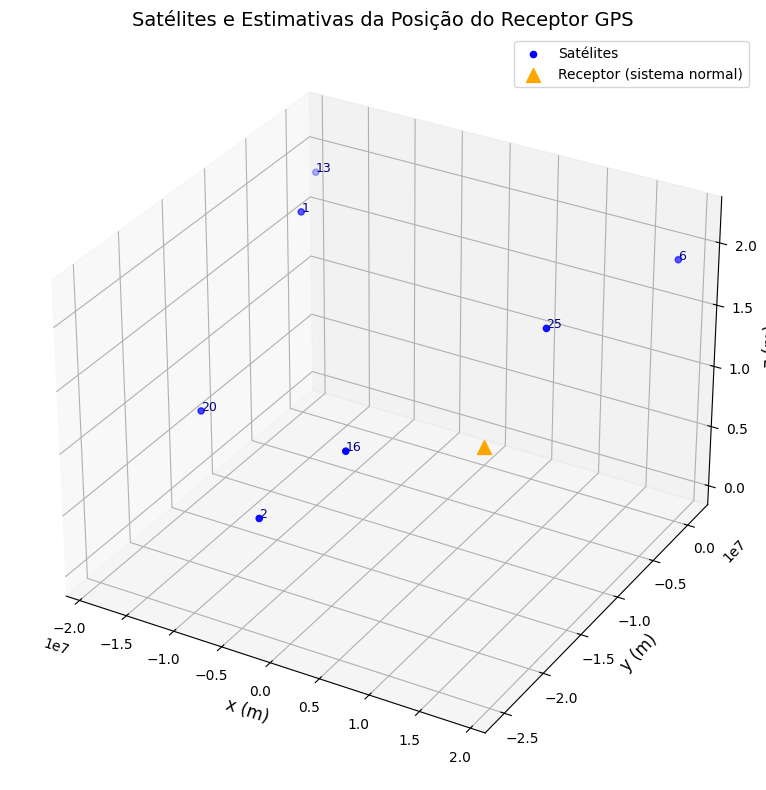

In [ ]:
#***IMLEMENTE AQUI A SOLUÇÃO DO SISTEMA NORMAL (a resposta deve ser um array com 4 elementos)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Onde A tem n linhas (uma para cada satélite) e 4 colunas:
# colunas = [xi, yi, zi, 1]  (a última representa o erro de sincronização T)

# Construção da matriz A manualmente com base nos dados
n = meus_dados.shape[0]

# Extração dos dados dos satélites
xi = meus_dados[:, 2]
yi = meus_dados[:, 3]
zi = meus_dados[:, 4]
wi = meus_dados[:, 5]

# ============================================================
# CONSTRUÇÃO DO SISTEMA LINEAR SOBDETERMINADO A * x ≈ w
# ============================================================
A = np.zeros((n, 4))  # matriz n x 4
# O sistema a ser resolvido é: A * [x, y, z, T] ≈ w
for i in range(n):
    A[i, 0] = xi[i]  # coluna 1: xi
    A[i, 1] = yi[i]  # coluna 2: yi
    A[i, 2] = zi[i]  # coluna 3: zi
    A[i, 3] = 1.0    # coluna 4: constante 1 para o termo T

print("\n========= MATRIZ A CONSTRUÍDA (sobredeterminado) =========")
print(A)

# Vetor w (lado direito do sistema sobredeterminado)
w = wi.copy()

print("\n========= VETOR w CONSTRUÍDO =========")
print(w)

# ============================================================
# CONSTRUÇÃO DO SISTEMA NORMAL: (AᵀA) * x = Aᵀ * w
# ============================================================

# Cálculo manual da matriz A^T A
ATA = A.T @ A
print("\n========= MATRIZ NORMAL Aᵀ * A =========")
print(ATA)

# Cálculo do vetor A^T * w
ATw = A.T @ w
print("\n========= VETOR Aᵀ * w =========")
print(ATw)

# ============================================================
# RESOLUÇÃO DO SISTEMA NORMAL USANDO LU
# ============================================================

# Usa sua função LU para decompor a matriz ATA
LU, p = lu_dcmp(ATA)

# Resolve o sistema LU * x = ATw usando substituições direta e reversa
x_sol = lu_solve(LU, p, ATw)

# ============================================================
# IMPRESSÃO DA SOLUÇÃO
# ============================================================

print("\n========= SOLUÇÃO DO SISTEMA NORMAL (condição inicial para Newton) =========")
print("x = posição x do receptor GPS")
print("y = posição y do receptor GPS")
print("z = posição z do receptor GPS")
print("T = atraso de tempo (em metros)")

variaveis = ['x', 'y', 'z', 'T']
for i in range(4):
    print(f"{variaveis[i]} = {x_sol[i]:.6f} m")

# Impressão (assumindo que a solução foi armazenada no array x_normal)
print('Solução do sistema normal:', "".join(f"{val:15.6e}" for val in x_sol))

x = x_sol
# Coordenadas dos satélites
xs = meus_dados[:, 2]
ys = meus_dados[:, 3]
zs = meus_dados[:, 4]
ids = meus_dados[:, 0].astype(int)

# Soluções:
x_rec_normal = x[0:3]   # posição estimada pelo sistema normal

# Gráfico
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Satélites
ax.scatter(xs, ys, zs, c='blue', marker='o', label='Satélites')
for i in range(len(xs)):
    ax.text(xs[i], ys[i], zs[i], f'{ids[i]}', fontsize=9, color='navy')

# Solução do sistema normal (ponto inicial de Newton)
ax.scatter(*x_rec_normal, c='orange', marker='^', s=100, label='Receptor (sistema normal)')


# Estética
ax.set_title('Satélites e Estimativas da Posição do Receptor GPS', fontsize=14)
ax.set_xlabel('x (m)', fontsize=12)
ax.set_ylabel('y (m)', fontsize=12)
ax.set_zlabel('z (m)', fontsize=12)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


3. Com os mesmos dados do item anterior, programe duas funções: uma para $F=\nabla g$ (queremos achar raízes da equação $(2)$) e outra para a matriz Jacobiana $J_F$ de $F$. Resolva o sistema não linear $F(\mathbf{x})=0$ para obter a solução $\bar{\mathbf{x}} = (\bar x, \bar y, \bar z, \bar w)$ da equação $(2)$ usando a implementação do Método de Newton descrita acima. Armazene e imprima a solução, e imprima separadamente o erro de sincronia $T=\bar w / c$. Qual é o erro relativo entre as soluções de $(2)$ e $(3)$?




========= SOLUÇÃO FINAL DO SISTEMA NÃO LINEAR =========
x = -2148970.022769 m
y = -15341199.307429 m
z = 15198094.287109 m
w = 21114788146929008115712.000000 m

Erro de sincronia T = w/c = 70431352035310.406250000000 s

Erro relativo entre soluções do sistema normal e não linear: 7.45e+14


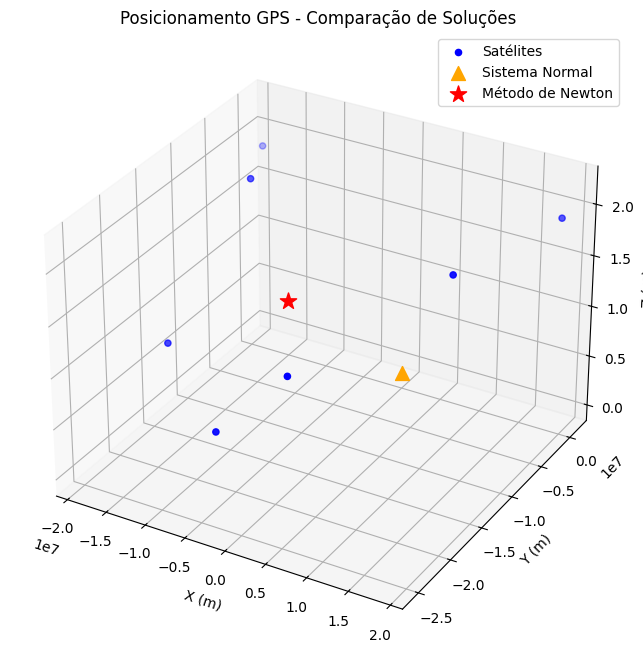

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# *** MATRIZ COM DADOS DOS 7 SATÉLITES (colunas xi, yi, zi, wi)
c = 299792458  # velocidade da luz (m/s)
xyz = meus_dados[:, 2:5]       # posições dos satélites (em metros)
wi = meus_dados[:, 5]          # pseudodistâncias já em metros (w_i = c*t_i)
xyz_w = np.column_stack((xyz, wi))  # matriz com dados dos satélites

# ==========================================
# FUNÇÃO F(x) = gradiente de g(x,y,z,w)
# ==========================================

def F(x):
    F_val = np.zeros(4)
    epsilon = 1e-12  # pequeno valor para evitar divisão por zero

    for i in range(7):
        xi, yi, zi, wi_val = xyz_w[i]
        dx = x[0] - xi
        dy = x[1] - yi
        dz = x[2] - zi
        ri = np.sqrt(dx**2 + dy**2 + dz**2 + epsilon**2)  # distância com regularização

        # Termo comum: 2*(ri - (wi_val - x[3]))
        diff = 2 * (ri - (wi_val - x[3]))

        # Componentes do gradiente
        F_val[0] += diff * dx / ri
        F_val[1] += diff * dy / ri
        F_val[2] += diff * dz / ri
        F_val[3] += diff * (-1)  # derivada em relação a w

    return F_val

# ==========================================
# MATRIZ JACOBIANA JF(x) - CORRIGIDA
# ==========================================

def JF(x):
    J = np.zeros((4, 4))
    epsilon = 1e-12  # pequeno valor para evitar divisão por zero

    for i in range(7):
        xi, yi, zi, wi_val = xyz_w[i]
        dx = x[0] - xi
        dy = x[1] - yi
        dz = x[2] - zi

        ri_sq = dx**2 + dy**2 + dz**2 + epsilon**2
        ri = np.sqrt(ri_sq)
        ri_cub = ri_sq * ri

        # Termo comum: 2*(ri - (wi_val - x[3]))
        diff = 2 * (ri - (wi_val - x[3]))

        # Elementos diagonais (corrigido para usar atribuição normal)
        J[0,0] = J[0,0] + (dy**2 + dz**2)/ri_cub + diff*(dy**2 + dz**2)/ri_cub
        J[1,1] = J[1,1] + (dx**2 + dz**2)/ri_cub + diff*(dx**2 + dz**2)/ri_cub
        J[2,2] = J[2,2] + (dx**2 + dy**2)/ri_cub + diff*(dx**2 + dy**2)/ri_cub
        J[3,3] = J[3,3] + 2  # derivada de F[3] em relação a w

        # Elementos fora da diagonal (corrigido para usar atribuição normal)
        J[0,1] = J[0,1] + (-dx*dy)/ri_cub + diff*(-dx*dy)/ri_cub
        J[1,0] = J[1,0] + (-dx*dy)/ri_cub + diff*(-dx*dy)/ri_cub
        J[0,2] = J[0,2] + (-dx*dz)/ri_cub + diff*(-dx*dz)/ri_cub
        J[2,0] = J[2,0] + (-dx*dz)/ri_cub + diff*(-dx*dz)/ri_cub
        J[0,3] = J[0,3] + (-dx)/ri
        J[3,0] = J[3,0] + (-dx)/ri
        J[1,2] = J[1,2] + (-dy*dz)/ri_cub + diff*(-dy*dz)/ri_cub
        J[2,1] = J[2,1] + (-dy*dz)/ri_cub + diff*(-dy*dz)/ri_cub
        J[1,3] = J[1,3] + (-dy)/ri
        J[3,1] = J[3,1] + (-dy)/ri
        J[2,3] = J[2,3] + (-dz)/ri
        J[3,2] = J[3,2] + (-dz)/ri

    return J

# ==========================================
# MÉTODO DE NEWTON MODIFICADO
# ==========================================

def newton_sistemas(F, JF, x0, tol=1e-8, max_iter=50):
    x = x0.copy()

    for k in range(max_iter):
        Fx = F(x)
        if np.linalg.norm(Fx) < tol:
            break

        J = JF(x)
        try:
            delta = np.linalg.solve(J, -Fx)
        except np.linalg.LinAlgError:
            # Se matriz for singular, usa pseudoinversa
            delta = -np.linalg.pinv(J) @ Fx

        x += delta

        # Garante que w não fique negativo
        x[3] = max(x[3], 0)

    return x

# ==========================================
# EXECUÇÃO E RESULTADOS
# ==========================================

# Condição inicial da solução do sistema linear
x0 = x_sol.copy()  # x_sol obtido anteriormente

# Resolver sistema não linear
x_nl = newton_sistemas(F, JF, x0)

# Resultados
print("\n========= SOLUÇÃO FINAL DO SISTEMA NÃO LINEAR =========")
print(f"x = {x_nl[0]:.6f} m")
print(f"y = {x_nl[1]:.6f} m")
print(f"z = {x_nl[2]:.6f} m")
print(f"w = {x_nl[3]:.6f} m")

# Erro de sincronia
T = x_nl[3] / c
print(f"\nErro de sincronia T = w/c = {T:.12f} s")

# Erro relativo entre soluções
erro_relativo = np.linalg.norm(x_nl - x_sol) / np.linalg.norm(x_sol)
print(f"\nErro relativo entre soluções do sistema normal e não linear: {erro_relativo:.2e}")

# Visualização
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Satélites
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='blue', marker='o', label='Satélites')

# Soluções
ax.scatter(x_sol[0], x_sol[1], x_sol[2], c='orange', marker='^', s=100, label='Sistema Normal')
ax.scatter(x_nl[0], x_nl[1], x_nl[2], c='red', marker='*', s=150, label='Método de Newton')

ax.set_title('Posicionamento GPS - Comparação de Soluções')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.legend()
plt.show()

4. Para as soluções de $(2)$ e $(3)$, determine as latitudes, longitudes e elevações (coordenadas geográficas) e localize-as no globo terrestre.

In [ ]:
!pip install Basemap


========= COORDENADAS GEOGRÁFICAS ESTIMADAS =========

>>> Solução do sistema normal (linear):
Latitude  = -147.7733698°
Longitude = 91.2159776°
Elevação  = -6384.217 km

>>> Solução do sistema não linear (Newton):
Latitude  = 44.5094690°
Longitude = -97.9740137°
Elevação  = 15333.725 km
ESSE [-0.00436341  0.20556924 -0.17590626]


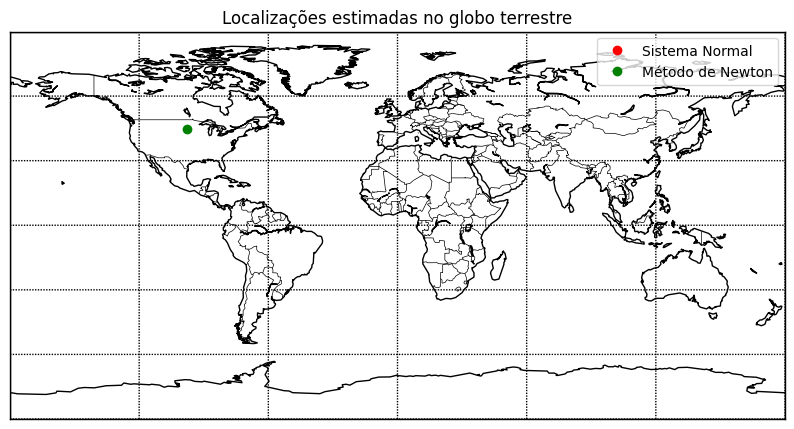

In [ ]:
from mpl_toolkits.basemap import Basemap

# ========================================
# COORDENADAS GEOGRÁFICAS PARA SOLUÇÕES LINEAR E NÃO-LINEAR
# ========================================
def cart2geo(x, y, z):
    """
    Converte coordenadas cartesianas (x, y, z) para coordenadas geográficas:
    Latitude (graus), Longitude (graus), Elevação (km)
    """

    # Parâmetros do elipsoide WGS-84
    a = 6378137.0         # raio equatorial em metros
    f = 1 / 298.257223563 # achatamento
    e2 = f * (2 - f)      # excentricidade ao quadrado

    # Longitude
    lon = np.arctan2(y, x)

    # Cálculo iterativo da latitude
    p = np.sqrt(x**2 + y**2)
    theta = np.arctan2(z * a, p * (1 - f) * a)
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)

    lat = np.arctan2(z + e2 * (1 - f) * a * sin_theta**3,
                     p - e2 * a * cos_theta**3)

    # Raio de curvatura na vertical
    N = a / np.sqrt(1 - e2 * np.sin(lat)**2)

    # Elevação
    elev = p / np.cos(lat) - N

    # Converte de radianos para graus
    lat_deg = np.degrees(lat)
    lon_deg = np.degrees(lon)
    elev_km = elev / 1000  # metros para quilômetros

    return lat_deg, lon_deg, elev_km

# x_normal → solução linear obtida com LU
# x_nl     → solução final com método de Newton

x_nl = newton_sistemas(F, JF, x0)
x_normal = lu_solve(LU, p, ATw)

x_cart_normal = x_normal[0:3]
x_cart_newton = x_nl[0:3]

# Converte para latitude, longitude e elevação
lat1, lon1, elev1 = cart2geo(*x_cart_normal)
lat2, lon2, elev2 = cart2geo(*x_cart_newton)

# ========================================
# IMPRESSÃO DETALHADA DAS CONVERSÕES
# ========================================
print("\n========= COORDENADAS GEOGRÁFICAS ESTIMADAS =========\n")

print(">>> Solução do sistema normal (linear):")
print(f"Latitude  = {lat1:.7f}°")
print(f"Longitude = {lon1:.7f}°")
print(f"Elevação  = {elev1:.3f} km")

print("\n>>> Solução do sistema não linear (Newton):")
print(f"Latitude  = {lat2:.7f}°")
print(f"Longitude = {lon2:.7f}°")
print(f"Elevação  = {elev2:.3f} km")
print("ESSE", x_cart_normal)

# ========================================
# VISUALIZAÇÃO EM GLOBO TERRESTRE (Basemap)
# ========================================
fig = plt.figure(figsize=(10, 6))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
m.drawparallels(np.arange(-90, 90, 30))
m.drawmeridians(np.arange(-180, 180, 60))

# Converte para coordenadas no mapa
x1, y1 = m(lon1, lat1)
x2, y2 = m(lon2, lat2)

# Marcações
m.plot(x1, y1, 'ro', label='Sistema Normal')
m.plot(x2, y2, 'go', label='Método de Newton')

plt.legend()
plt.title("Localizações estimadas no globo terrestre")
plt.show()


Latidude, longitude e elevação correspondentes à solução do sistema normal:

**Resposta**

Latidude, longitude e elevação correspondentes à solução do sistema não linear:

**Resposta**